In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
import numpy as np
import matplotlib.pyplot as plt


In [ ]:
dataset = pd.read_csv('Data.csv',sep = ',')

I want to say this is very helpful code in determining the prices of houses in a certain area

In [ ]:
dataset.head(10)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2
5,0.02985,0.0,2.18,0,0.458,6.430,58.7,6.0622,3,222,18.7,394.12,5.21,28.7
6,0.08829,12.5,7.87,0,0.524,6.012,66.6,5.5605,5,311,15.2,395.60,12.43,22.9
7,0.14455,12.5,7.87,0,0.524,6.172,96.1,5.9505,5,311,15.2,396.90,19.15,27.1
8,0.21124,12.5,7.87,0,0.524,5.631,100.0,6.0821,5,311,15.2,386.63,29.93,16.5
9,0.17004,12.5,7.87,0,0.524,6.004,85.9,6.5921,5,311,15.2,386.71,17.10,18.9


In [ ]:
np.shape(dataset)

(506, 14)

In [ ]:
dataset_x = dataset.iloc[:,:13]  # selecting features from target variable.  Y is target variable
dataset_y = dataset.iloc[:,-1]

In [1]:
dataset_x

NameError: ignored

In [ ]:
training_dataset_x, test_dataset_x, training_dataset_y, test_dataset_y = train_test_split(dataset_x, dataset_y, test_size = 0.20)
# splitting the dataset into the two categories. the training data and the test data

In [ ]:
test_dataset_x

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
324,0.34109,0.0,7.38,0,0.493,6.415,40.1,4.7211,5,287,19.6,396.90,6.12
127,0.25915,0.0,21.89,0,0.624,5.693,96.0,1.7883,4,437,21.2,392.11,17.19
479,14.33370,0.0,18.10,0,0.614,6.229,88.0,1.9512,24,666,20.2,383.32,13.11
187,0.07875,45.0,3.44,0,0.437,6.782,41.1,3.7886,5,398,15.2,393.87,6.68
462,6.65492,0.0,18.10,0,0.713,6.317,83.0,2.7344,24,666,20.2,396.90,13.99
...,...,...,...,...,...,...,...,...,...,...,...,...,...
326,0.30347,0.0,7.38,0,0.493,6.312,28.9,5.4159,5,287,19.6,396.90,6.15
85,0.05735,0.0,4.49,0,0.449,6.630,56.1,4.4377,3,247,18.5,392.30,6.53
227,0.41238,0.0,6.20,0,0.504,7.163,79.9,3.2157,8,307,17.4,372.08,6.36
467,4.42228,0.0,18.10,0,0.584,6.003,94.5,2.5403,24,666,20.2,331.29,21.32


In [ ]:
mms = MinMaxScaler() #Function to scale the dataset
mms.fit(training_dataset_x)   
training_dataset_x = mms.transform(training_dataset_x)# applying to the training and test data
test_dataset_x = mms.transform(test_dataset_x)

In [ ]:
model = Sequential(name='BostonHousingPrices')
model.add(Dense(100, input_dim = 13, activation='relu', name='Hidden-1'))     # Building the Keras model
model.add(Dense(100, activation='relu', name='Hidden-2'))
model.add(Dense(1, activation='linear', name='Output'))
model.compile(optimizer='rmsprop', loss='mse', metrics = ['mae'])   # still building

In [ ]:
?Sequential

In [ ]:
hist = model.fit(training_dataset_x, training_dataset_y, batch_size=32, epochs=100, validation_split=0.2)


Epoch 1/100
11/11 [==============================] - 1s 19ms/step - loss: 579.1488 - mae: 21.9361 - val_loss: 445.0030 - val_mae: 19.2964
Epoch 2/100
11/11 [==============================] - 0s 7ms/step - loss: 460.8820 - mae: 18.9584 - val_loss: 321.5364 - val_mae: 15.6543
Epoch 3/100
11/11 [==============================] - 0s 6ms/step - loss: 320.9332 - mae: 14.9900 - val_loss: 201.6610 - val_mae: 11.2115
Epoch 4/100
11/11 [==============================] - 0s 5ms/step - loss: 202.9767 - mae: 11.1256 - val_loss: 128.8953 - val_mae: 8.5435
Epoch 5/100
11/11 [==============================] - 0s 7ms/step - loss: 141.3874 - mae: 9.0321 - val_loss: 109.3708 - val_mae: 8.0122
Epoch 6/100
11/11 [==============================] - 0s 5ms/step - loss: 123.1519 - mae: 8.3360 - val_loss: 96.9742 - val_mae: 7.5752
Epoch 7/100
11/11 [==============================] - 0s 5ms/step - loss: 107.1105 - mae: 7.8451 - val_loss: 79.8185 - val_mae: 6.6992
Epoch 8/100
11/11 [==============================

In [ ]:
hist = model.fit(training_dataset_x, training_dataset_y, batch_size=32, epochs=500, validation_split=0.2)

Epoch 1/500
11/11 [==============================] - 0s 8ms/step - loss: 17.8165 - mae: 2.8903 - val_loss: 12.2271 - val_mae: 2.4966
Epoch 2/500
11/11 [==============================] - 0s 5ms/step - loss: 17.3642 - mae: 2.8238 - val_loss: 11.6506 - val_mae: 2.4290
Epoch 3/500
11/11 [==============================] - 0s 5ms/step - loss: 17.5223 - mae: 2.8528 - val_loss: 13.5689 - val_mae: 2.8787
Epoch 4/500
11/11 [==============================] - 0s 5ms/step - loss: 17.5502 - mae: 2.8685 - val_loss: 14.1182 - val_mae: 2.7373
Epoch 5/500
11/11 [==============================] - 0s 4ms/step - loss: 17.9731 - mae: 2.8859 - val_loss: 10.7126 - val_mae: 2.3491
Epoch 6/500
11/11 [==============================] - 0s 6ms/step - loss: 16.8708 - mae: 2.7822 - val_loss: 12.0523 - val_mae: 2.7246
Epoch 7/500
11/11 [==============================] - 0s 5ms/step - loss: 17.4829 - mae: 2.8384 - val_loss: 12.2178 - val_mae: 2.7302
Epoch 8/500
11/11 [==============================] - 0s 7ms/step - lo

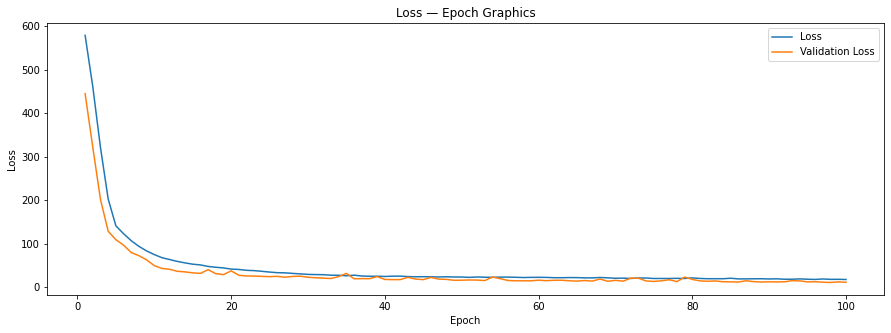

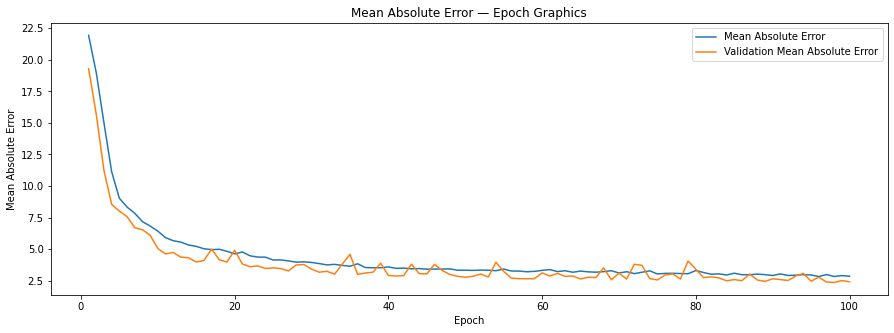

In [ ]:
figure = plt.gcf()
figure.set_size_inches((15, 5))
plt.title('Loss — Epoch Graphics')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.plot(range(1, len(hist.history['loss']) + 1), hist.history['loss'])
plt.plot(range(1, len(hist.history['val_loss']) + 1), hist.history['val_loss'])
plt.legend(['Loss', 'Validation Loss'])
plt.show()
figure = plt.gcf()
figure.set_size_inches((15, 5))
plt.title('Mean Absolute Error — Epoch Graphics')
plt.xlabel('Epoch')
plt.ylabel('Mean Absolute Error')
plt.plot(range(1, len(hist.history['mae']) + 1), hist.history['mae'])
plt.plot(range(1, len(hist.history['val_mae']) + 1), hist.history['val_mae'])
plt.legend(['Mean Absolute Error', 'Validation Mean Absolute Error'])
plt.show()

In [ ]:
predict_data = np.array([0.00632, 18, 2.31, 0, 0.538, 6.575, 65.2, 4.09, 1, 296,15.3,396.9,4.98]) #0.63796, 0.00, 8.140, 0, 0.5380, 6.0960, 84.50, 4.4619, 4, 307.0, 21.00, 380.02, 10.26])
predict_data = mms.transform(predict_data.reshape(1, -1))
predict_result = model.predict(predict_data)
print(f'Predicted result: {predict_result[0, 0]}')

1/1 [==============================] - 0s 21ms/step
Predicted result: 23.51988983154297


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  "X does not have valid feature names, but"


In [ ]:
import numpy as np